In [99]:
import numpy as np
import pandas as pd

In [100]:
df = pd.read_csv('news.csv')

In [101]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [102]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [103]:
df['label']=df['label'].replace('FAKE',0)

In [104]:
df['label']=df['label'].replace('REAL',1)

In [105]:
df.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1


In [60]:
df.isna().sum()

title    0
text     0
label    0
dtype: int64

In [61]:
df.shape

(6335, 3)

In [62]:
messages=df.copy()

In [63]:
messages.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1


In [64]:
messages['text'][5]

'  \nI’m not an immigrant, but my grandparents are. More than 50 years ago, they arrived in New York City from Iran. I grew up mainly in central New Jersey, an American kid playing little league for the Raritan Red Sox and soccer for the Raritan Rovers. In 1985, I travelled with my family to our ancestral land. I was only eight, but old enough to understand that the Iranians had lost their liberty and freedom. I saw the abject despair of a people who, in a desperate attempt to bring about change, had ushered in nationalist tyrants led by Ayatollah Khomeini. \nWhat I witnessed during that year in Iran changed the course of my life. In 1996, at age 19, wanting to help preserve the blessings of liberty and freedom we enjoy in America, I enlisted in the U.S. Navy. Now, with the rise of Donald Trump and his nationalist alt-right movement, I’ve come to feel that the values I sought to protect are in jeopardy. \nIn Iran, theocratic fundmentalists sowed division and hatred of outsiders — of We

In [66]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()

In [67]:
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [69]:
corpus[3]

'kayde king kaydeek novemb lesson tonight dem loss time democrat start listen voter stop run establish candid peopl berni peopl berni novemb dem want tight race work berni walker bragman walkerbragman novemb new york time columnist paul krugman one hillari clinton outspoken surrog contenti democrat primari blame clinton poor perform green parti candid jill stein far receiv neglig number vote nation say stein ralph nader prevent clinton victori account berniesteach threw krugman analysi back face candid issu take respons http co khyouusrf teacher berni berniesteach novemb ana navarro republican recent endors hillari clinton sum preposter natur presidenti elect tweet gop nomin damn candid could lose hillari clinton democrat nomin damn candid could lose trump ana navarro ananavarro novemb popular left wing facebook page pro sander primari respond trump surg simpli post meme sander face text could avoid thank noth dnc meme share almost time less hour post tuesday novemb berni sander endors

In [70]:
## Applying Countvectorizer
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [71]:
X.shape

(6335, 5000)

In [72]:
y=messages['label']

0       0
1       0
2       1
3       0
4       1
       ..
6330    1
6331    0
6332    0
6333    1
6334    1
Name: label, Length: 6335, dtype: int64

In [74]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [78]:
cv.get_feature_names_out()[:20]

array(['abandon', 'abc', 'abc news', 'abdullah', 'abedin', 'abil', 'abl',
       'abort', 'abroad', 'absenc', 'absolut', 'absurd', 'abus', 'academ',
       'academi', 'acceler', 'accept', 'access', 'access pipelin',
       'accid'], dtype=object)

In [79]:

cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [80]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names())

In [81]:
count_df.head()

,abandon,abc,abc news,abdullah,abedin,abil,abl,abort,abroad,absenc,...,young,young peopl,younger,youth,youtub,zero,zika,zionist,zone,zulu
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
import matplotlib.pyplot as plt

In [84]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# MultinomialNB Algorithm

In [85]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [86]:
from sklearn import metrics
import numpy as np
import itertools

In [87]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.873


Confusion matrix, without normalization


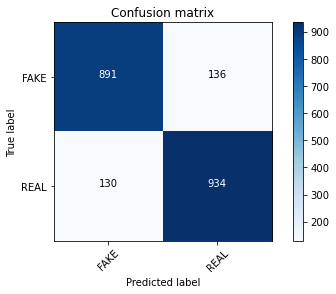

In [88]:
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])